In [1]:
import networkx as nx
import numpy as np
from sympy import symbols, Matrix, solve

# First Question:
Consider graph below: <br>
<img src="images/1.png" alt="drawing" width="300"/> <br>


2.0

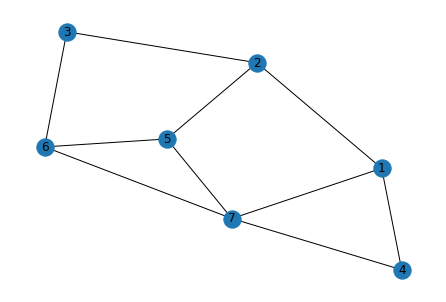

In [2]:
G = nx.Graph()
G.add_nodes_from([i for i in range(1,8)])
G.add_edges_from([(1,2), (2,3), (3,6), (2,5), (1,7), (1,4), (4,7), (6,7), (5,7), (5,6)])
nx.draw(G, with_labels=True)
number_of_triangles = sum(nx.triangles(G).values()) / 3
number_of_triangles


## A) Find adjacency matrix of graph:

In [3]:
A = nx.adjacency_matrix(G).todense()
Matrix(A)

Matrix([
[0, 1, 0, 1, 0, 0, 1],
[1, 0, 1, 0, 1, 0, 0],
[0, 1, 0, 0, 0, 1, 0],
[1, 0, 0, 0, 0, 0, 1],
[0, 1, 0, 0, 0, 1, 1],
[0, 0, 1, 0, 1, 0, 1],
[1, 0, 0, 1, 1, 1, 0]])

## B) Find eigenvalues and eigenvectors corresponding to adjacency matrix:

In [4]:
Lambda, = symbols(['L'])
I = np.identity(7)
B = Matrix(A - Lambda*I)
B.det()

-1.0*L**7 + 10.0*L**5 + 4.0*L**4 - 21.0*L**3 - 6.0*L**2 + 11.0*L

In [5]:
eigenvalues = solve(B.det())
eigenvalues

[-2.22736831208456,
 -1.67822270590098,
 -1.07702191696139,
 0.0,
 0.709916061304175,
 1.29063198286390,
 2.98206489077886]

In [8]:
_, e_vectors = np.linalg.eig(A)
e_vectors

matrix([[-3.85434652e-01, -3.91477495e-01, -2.56089948e-01,
          5.53608544e-01,  4.29190282e-01,  3.76718357e-01,
          2.42609259e-17],
        [-3.52745886e-01,  5.66477542e-01,  4.17471510e-03,
         -9.56048335e-02, -2.30445419e-01,  6.33641570e-01,
         -3.01511345e-01],
        [-2.49438203e-01, -3.82289811e-01,  3.25807173e-01,
         -1.38499291e-01, -4.61930743e-01,  2.98808200e-01,
          6.03022689e-01],
        [-2.96850991e-01,  7.00608526e-02, -2.49934573e-01,
         -6.87659361e-01,  5.29793705e-01,  6.14954065e-03,
          3.01511345e-01],
        [-4.17038267e-01, -4.87986822e-01, -7.67233264e-02,
         -3.12140752e-01, -2.64679767e-01, -2.25694229e-01,
         -6.03022689e-01],
        [-3.91095023e-01,  2.85022669e-01, -5.50951710e-01,
          2.44771605e-01, -3.65737172e-01, -4.21512830e-01,
          3.01511345e-01],
        [-4.99794266e-01,  2.35426172e-01,  6.75535824e-01,
          1.87015659e-01,  2.54578418e-01, -3.72352699e-01

## C) What is the acceptable lambda for running eigenvector centrality?

For every x we have:<br>
$$x=\sum_{i=1}^n c_{i}. v_{i}$$<br>
multiply it by A:<br>
$$Ax=A\sum_{i=1}^n c_{i}. v_{i}=\sum_{i=1}^n c_{i}.(A v_{i})=\sum_{i=1}^n c_{i}. (\lambda_{i}v_{i})=\sum_{i=1}^n \lambda_{i}c_{i}.v_{i}$$
<br>
then:<br>
$$A^kx=\sum_{i=1}^n c_{i}.A^k v_{i}=\sum_{i=1}^n c_{i}. \lambda_{i} ^ k v_{i}=c_{1} \lambda _{1}^k v_{1} + \sum_{i=2}^n c_{i}. \lambda_{i}^k  v_{i}= c_{1} \lambda _{1}^k v_{1} + \lambda_{1} ^ k  \sum_{i=2}^n c_{i}. \frac {\lambda_{i}^k} {\lambda_{1} ^k}  v_{i}$$ <br>
Lambdas are sorted in descending order so $$\frac {\lambda_{i}^k} {\lambda_{1} ^k}$$ converges to 0 then: $$ x ~= v_{1} $$